# Ising Model

**Author**: Sneha Ramshanker <br> **Date**: 15th December 2019 <br> **Version**: Final

This is the final version for applying the Metropolis algorithm to the 2D Ising Model. The aim of this program is to run a metropolis simulation of the ising model and test to see how changing the constants affects the resulting calculation for mean magnetic moment of the lattice. 

### Initialization

We start with a 30 x 30 array with each element representing a magnet with spin +1 (spin up) or -1 (spin down). We configure the array to be a random sample of spin up and spin down sites initially. 

### Boundary Conditions

We are simulating a large lattice so we assume periodic boundary conditions 

### Sweeping Procedure

This program has the capability of running two kinds of methods for sweeping through the lattice:<br>
1) Selecting sites at random to flip (Each choice represents a step/sweep) <br>
2) Going through the lattice systematically (Each choice represents a step and probing through the entire lattice represents a sweep)<br>
After testing, it was found that procedure one is more suitable for this situation because it is more randomized so allows the metropolis algorithm to perform better

### Procedure

1) Select a random spin <br> 2) Calculate dE <br> 3) If dE<0, flip spin. If dE>0, flip with prob = exp(-dE/kT) <br> 4) Repeat 

In [5]:
from numpy.random import *
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [374]:
def setPlotStyle():
    """
    Parameters:
        None
    Return: 
        None
    Note:
        This function sets are the styllistic parameters for plots 
    """
    plt.style.use('ggplot')
    plt.rcParams['lines.linewidth'] = 2.15
    plt.rcParams['lines.markeredgewidth'] = 0.0
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['grid.color'] = 'black'
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = '0.25'
    plt.rcParams['grid.alpha'] = '0.25'
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.titlesize'] = 'large'
    plt.rcParams['figure.titleweight'] = 'bold'
    plt.rcParams['figure.figsize'] = (12, 9)
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['patch.edgecolor'] = 'none'
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.rcParams['legend.fontsize'] = 20

setPlotStyle()

In [366]:
def randlatgen(ArrLen, bias = 0.5):
    """
    Input Parameters: 
    ArrLen (Integer) - Length of the lattice to be generated 
    
    Optional Parameters: 
    Bias (Float) - Bias of the lattice towards one spin where bias = 0 produces a complete spin up lattice and bias = 1 produces a complete spin down lattice 
    
    Output Parameter:
    lat (Array) - An square array where each element either has a value of -1, 1 that is randomly set 
    
    Description:
    This function randomly generates a square lattice with spin up or spin down sites
    
    Example Use:
    lat = randlatgen(5, bias = 0.2)
    """
    lat = np.zeros([ArrLen, ArrLen])
    for i in range(0, (ArrLen)):
        for j in range(0, (ArrLen)):
            if (rand()> bias):
                lat[i,j] = 1 
            else:
                lat[i, j] = -1
    return lat
def SumSpinNeighbour(lat, x, y):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    x (Integer) - x coordinate of a chosen site 
    
    y (Integer) - y coordinate of a chosen site 
    
    Output Parameter:
    Integer - Sum of the neighbouring spins 
    
    Description:
    This function returns the sum of the neighbouring spins of a chosen site in a lattice (Periodicity of the lattice is not accounted for in this function)
    
    Example Use:
    lat = randlatgen(2)
    sum = SumSpinNeighbour(lat, 0, 0)
    """
    return (lat[x-1,y]+lat[x+1,y]+lat[x,y-1]+lat[x,y+1])

def EnergyChange(lat, x, y, J = 1, B = 0):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    x (Integer) - x coordinate of a chosen site 
    
    y (Integer) - y coordinate of a chosen site 
    
    Optional Parameters: 
    J (Float/Integer) - Value of J 
    B (Float/Integer) - Value of B (Magnetic field)
    
    Output Parameter:
    dE (Float) - Change in energy if spin of the chosen site is flipped 
    
    Description:
    This function returns the change in energy if the a spin of a chosen site on a lattice is flipped 
    
    Example Use:
    lat = randlatgen(2)
    dE = EnergyChange(lat, 0, 0)
    """
    if x == len(lat)-1:
        x = -1 
    if y == len(lat)-1:
        y = -1 
    dE = 2*J*lat[x,y]*SumSpinNeighbour(lat,x,y) - 2*B*lat[x,y]
    return dE
def flip(lat,x,y):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    x (Integer) - x coordinate of a chosen site 
    
    y (Integer) - y coordinate of a chosen site 
    
    Output Parameter:
    lat_new (Array): New Lattice with the spin of a chosen site flipped 
    
    Description:
    This function flips the spin of a chosen site and returns the new lattice  
    
    Example Use:
    lat0 = randlatgen(2)
    lat1 = flip(lat0, 1, 0)
    """
    lat_new = np.copy(lat)
    lat_new[x,y] = -1*lat[x,y]
    return lat_new
def step(lat,x,y, J = 1, k = 1, T = 1, B = 0):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    x (Integer) - x coordinate of a chosen site 
    
    y (Integer) - y coordinate of a chosen site 
    
    Optional Parameters: 
    J (Float/Integer) - Value of J 
    B (Float/Integer) - Value of B (Magnetic field)
    k (Float/Integer) - Value of k 
    T (Float/Integer) - Value of Temperature 
    
    Output Parameter:
    lat_new (Array) - New Lattice after one step is completed  
    
    Description:
    This function returns the new lattice after one step is completed. The definition of a 'step' is described above in the introduction
    
    Example Use:
    lat = randlatgen(2)
    lat2 = step(lat, 0, 0)
    """
    dE = EnergyChange(lat,x,y, J, B) 
    if dE<0:
        lat_new = flip(lat, x, y)
    else:
        prob = np.exp(-dE/(k*T))
        if(rand()<prob):
            lat_new = flip(lat,x,y)
        else:
            lat_new = np.copy(lat)
    return lat_new
def seelat(lat):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    Output Parameter:
    None 
    
    Description:
    This function plots a visualization of a given lattice 
    
    Example Use:
    lat = randlatgen(2)
    seelat(lat)
    """
    latcopy = np.copy(lat)
    #Converting to plotable numbers 
    for i in range(0, len(lat)):
        for j in range(0, len(lat)):
            if lat[i,j] == -1:
                latcopy = 0
            else:
                latcopy = 1 
    plt.imshow(lat, cmap='binary')
def calcmm(lat):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
   
    Output Parameter:
    Float - mean magnetic moment of the lattice 
    
    Description:
    This function returns the mean magnetic moment of a given lattice  
    
    Example Use:
    lat = randlatgen(2)
    mm = calcmm(lat)
    """
    return np.mean(lat)
def sweep1_mm(lat,N, J = 1, k = 1, T = 1, B = 0):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    N (Integer) - Number of Steps  
    
    Optional Parameters: 
    J (Float/Integer) - Value of J 
    B (Float/Integer) - Value of B (Magnetic field)
    k (Float/Integer) - Value of k 
    T (Float/Integer) - Value of Temperature
    
    Output Parameter:
    mm (List) - Magnetic moment of each step 
    
    Description:
    This function performs N steps on a given lattice where a step is define in Procedure 1 and returns the a list of the mean magnetic moment after each step. 
    
    Example Use:
    lat = randlatgen(2)
    mm = sweep1_mm(lat, 100)
    steps = np.linspace(0, N, N)
    plt.plot(steps, mm, 'o')
    """
    mm = []
    for i in range (0, N):
        [x,y] = [randint(0,len(lat)), randint(0,len(lat))]
        lat = np.copy(step(lat,x,y, J, k , T, B))
        mm.append(calcmm(lat))
    return(mm)
def sweep2_mm(lat, J = 1, k = 1, T = 1, B = 0 ):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 

    Optional Parameters: 
    J (Float/Integer) - Value of J 
    B (Float/Integer) - Value of B (Magnetic field)
    k (Float/Integer) - Value of k 
    T (Float/Integer) - Value of Temperature
    
    Output Parameter:
    mm (Float) - Magnetic moment of a sweep 
    
    Description:
    This function performs a sweep (A sweep is when a step is performed systematically on all sites of the lattice) on a given lattice where a sweep is define in Procedure 2 and returns the mean magnetic moment after a sweep. 
    
    Example Use:
    lat = randlatgen(2)
    mm = sweep2_mm(lat)
    
    """
    for x in range (0, len(lat)):
        for y in range(0,len(lat)):
            lat = np.copy(step(lat,x,y, J, k , T, B))
    mm = (calcmm(lat))
    return(mm)
def sweep2_meanmm(lat, N, J = 1, k = 1, T = 1, B = 0):
     """
    Input Parameters: 
    lat (Array) -  A square lattice 
    
    N (Integer) - Number of Steps  
    
    Optional Parameters: 
    J (Float/Integer) - Value of J 
    B (Float/Integer) - Value of B (Magnetic field)
    k (Float/Integer) - Value of k 
    T (Float/Integer) - Value of Temperature
    
    Output Parameter:
    mm (List) - Mean Magnetic moment of each sweep 
    
    Description:
    This function performs N sweeps on a given lattice where a sweep is define in Procedure 2 and returns the a list of the mean magnetic moment after each sweep. 
    
    Example Use:
    lat = randlatgen(2)
    mm = sweep1_mm(lat, 100)
    steps = np.linspace(0, N, N)
    plt.plot(steps, mm, 'o')
    """
    sweeps = np.linspace(0,N,N)
    mm = []
    for i in range(0,N):
        mm.append(sweep2_mm(lat, J = J, k = k,  T = T, B = B))
    return np.mean(mm)

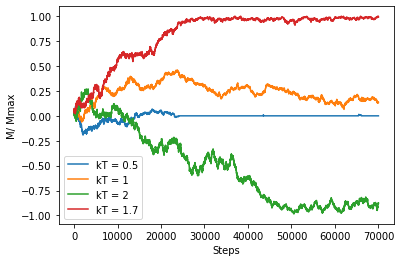

In [341]:
#Generating the Initial Lattice and defining initial conditions
lat = randlatgen(20)
N = 70000 #Number of steps in a sweep 
T = [0.5, 1, 2, 1.7] #List of Temp values to be plotted 

#PLotting Mean Magnetic Moment vs Step for the 4 temperatures 
for i in range (0, len(T)):   
    mm = sweep1_mm(lat, N, T = T[i]) #Running the Sweep according to procedure 1 
    steps = np.linspace(0, N, N)
    plt.plot(steps, mm, label = "kT = " +str(T[i]))
    plt.xlabel("Steps")
    plt.ylabel("M/ Mmax")
plt.legend()

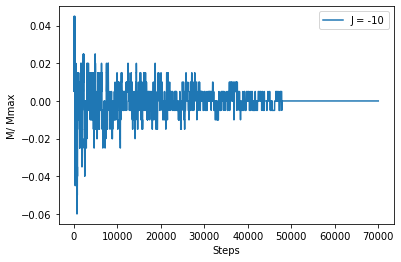

In [362]:
#Generating initial lattice and specificying initial conditions 
lat = randlatgen(20)
N = 70000 #Number of steps in a sweep
J = [-10] #List of J values 

#Plotting Magnetic Moment vs Steps for the various J values specified above 
for i in range (0, len(J)):   
    mm = sweep1_mm(lat, N, J = J[i])
    steps = np.linspace(0, N, N)
    plt.plot(steps, mm, label = "J = " +str(J[i]))
    plt.xlabel("Steps")
    plt.ylabel("M/ Mmax")
plt.legend()

In [363]:
#Plotting Mean mm vs Temperature 
lat = randlatgen(10)

T = np.linspace(0, 4, 100)
meanmm = []
for i in range(0, len(T)):
    mm = sweep1_mm(lat, 60000, T = T[i])
    meanmm.append(np.mean(mm[40000:]))
plt.plot(T, np.abs(meanmm), 'o')

IndexError: list index out of range

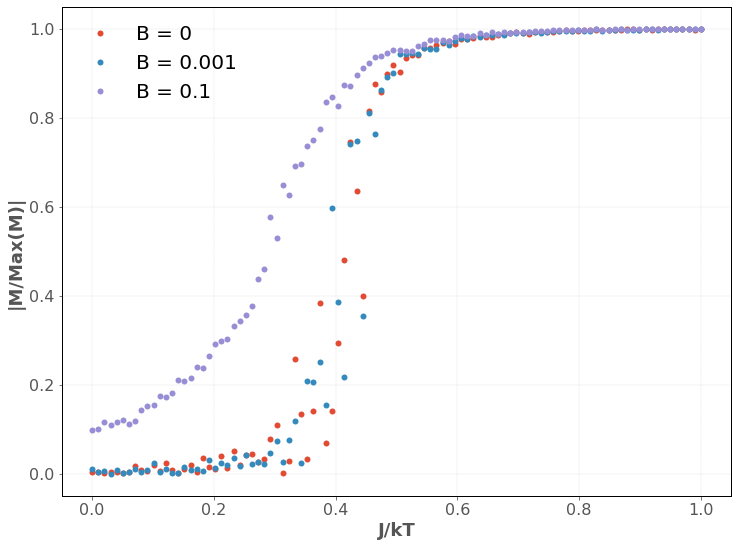

In [385]:
#Plotting Mean mm vs J for different vales of B 
#Initial Conditions 
lat = randlatgen(10)

J = np.linspace(0, 1, 100)
B = [0, 0.001, 0.1]

#PLotting the Sweep 
for j in range(0, len(B) ):
    meanmm = []
    for i in range(0, len(J)):
        mm = sweep1_mm(lat, 60000, J = J[i], B = B[j])
        meanmm.append(np.mean(mm[30000:]))
    plt.plot(J, np.abs(meanmm), 'o', label = 'B = '+str(B[j]))
    plt.xlabel("J/kT")
    plt.ylabel("|M/Max(M)|")
    plt.legend()
    

In [380]:
len(meanmm)

101

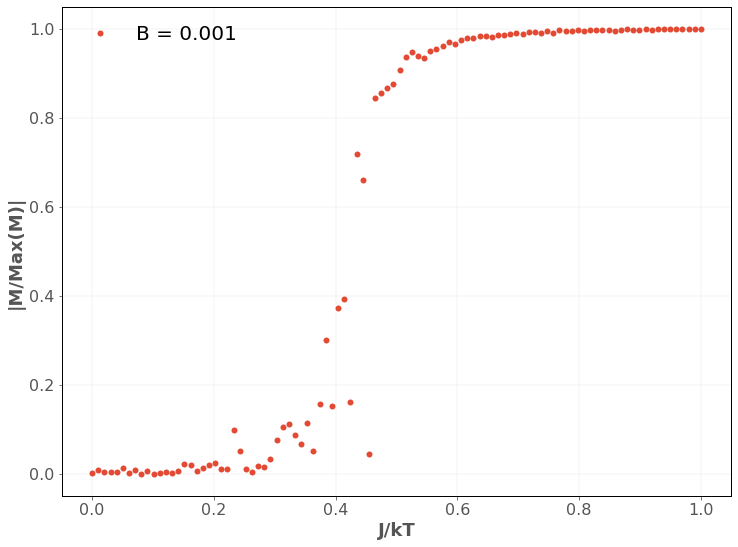

In [383]:
plt.plot(J, np.abs(meanmm[:-1]), 'o', label = 'B = 0.001')
plt.xlabel("J/kT")
plt.ylabel("|M/Max(M)|")
plt.legend()

Text(0, 0.5, 'M/Mmax')

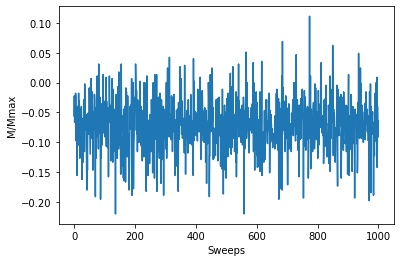

In [356]:
#PLotting Mean Magnetic Moment vs Sweeps (as defined in Sweeping Procedure 2)
lat = randlatgen(30, bias = 0.5)
N = 1000
sweeps = np.linspace(0,N,N)
mm = []
for i in range(0,N):
    mm.append(sweep2_mm(lat, T = 1))
plt.plot(sweeps,mm)
plt.xlabel("Sweeps")
plt.ylabel("M/Mmax")